In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from utils import *

In [2]:
plt.rc('font', family='NanumGothic')

In [3]:
df = build_dataframe('./20221111')

In [4]:
evt = get_event_date()

In [5]:
# ret = pred_sentiment(df, 512)

In [6]:
df = pd.read_pickle("20221111_df.pkl")

In [ ]:
sns.displot(data=df, x='score', hue='pred', multiple='dodge', shrink=.75, kind='hist', col='job', col_wrap=4, stat='percent', common_norm=False)
plt.savefig("res.svg")

In [7]:
date_seq = df.groupby(["time", "category"], as_index=False)['pred'].value_counts()

In [8]:
date_seq

,time,category,pred,count
0,06-18,궁수,부정,16
1,06-18,궁수,긍정,8
2,06-19,궁수,부정,39
3,06-19,궁수,긍정,14
4,06-20,궁수,부정,33
...,...,...,...,...
1065,11-11,마법사,긍정,18
1066,11-11,전사,부정,53
1067,11-11,전사,긍정,19
1068,11-11,해적,부정,16


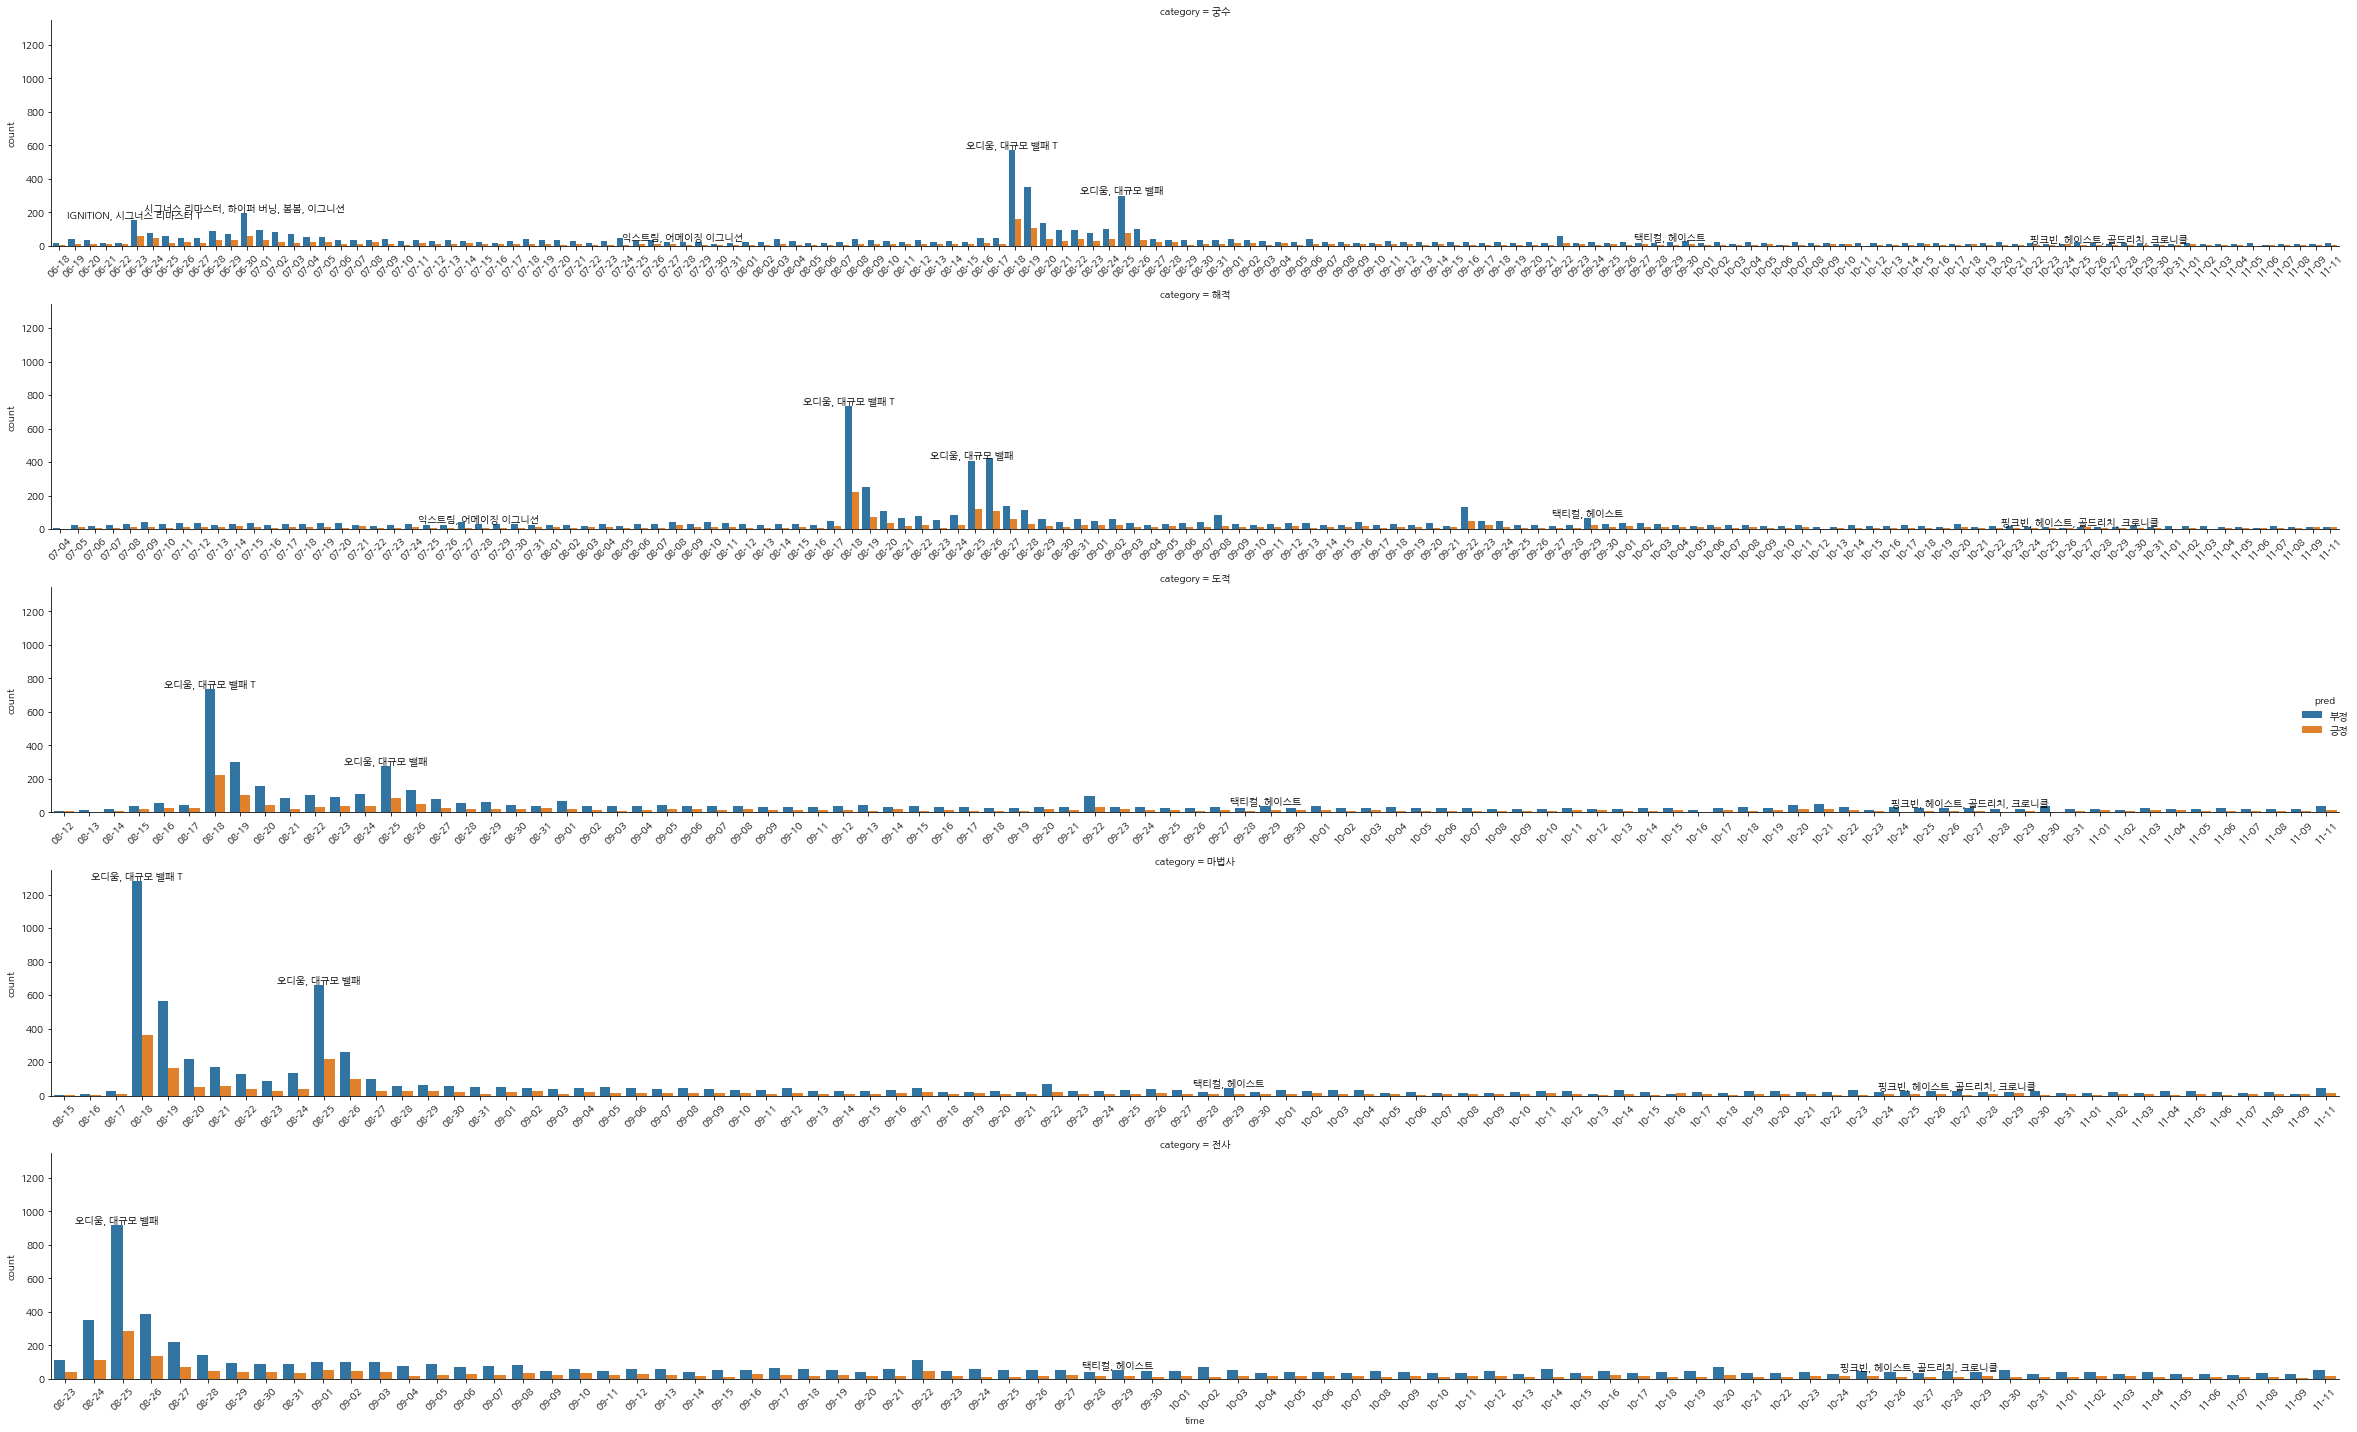

In [22]:
g = sns.catplot(data=date_seq, x='time', y='count', hue='pred', kind='bar', col='category', col_wrap=1, height=4, aspect=16/2, sharex=False)
for ax in g.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0], labels=[evt.get(txt.get_text(), "") for txt in ax.get_xticklabels()])
plt.tight_layout()
plt.savefig("sequenceal_sent.svg")